In [154]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [209]:
# Load the filepath of the annotations
label_frame = pd.read_csv('C:/Users/20192801/Documents/deep_learning_music_project/Tjielke/HF1/HF1/Songs/Haslebuskane/Aligned annotations/Ground truth/Haslebuskane_happy.csv',header=None)
onset_list = label_frame[0]

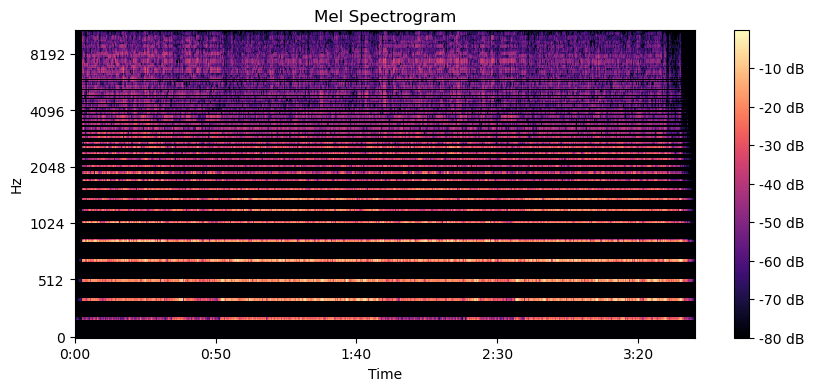

In [144]:
# Load the audio file
audio_path = 'C:/Users/20192801/Documents/deep_learning_music_project/Tjielke/HF1/HF1/Songs/Haslebuskane/Audio/filesHaslebuskane_happy.wav'
y, sr = librosa.load(audio_path)

# Compute the Mel spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=128,hop_length=128,n_mels=254)
#n_fft: length of the window that the fourier transform is done on. This means that the fourier transform will take the average frequencies of 128 frames of our music. We have 22050 frames per second in our dataset, hence an sr of 22050.
#hop_length: is the step that is taken each window, I have made it so the steps do not overlap, however, this is not common and we can change this value, but we should look into the performance and reasons for changing it. Logically, I thought that now the windows do not interfere and that that would be a good thing. 

#mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

# Convert to decibel scale (log scale) which is optional, and good depending on use case
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Plot the Mel spectrogram (optional)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()


In [196]:
mel_spectrogram.shape

(254, 9480)

In [210]:
# fix the onset, the list with the onset times is called onset_list

start_end_spect_target = pd.DataFrame(columns=['Start sample','End sample','Spectogram','onset'])
sample_time = (1/sr)*128
for i in range(mel_spectrogram.shape[1]):
    start_end_spect_target.loc[len(start_end_spect_target.index)] = [(0+i*sample_time), (sample_time+i*sample_time), mel_spectrogram[:,i],0]  

In [199]:
start_end_spect_target

,Start sample,End sample,Spectogram,onset
0,0.000000,0.005805,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
1,0.005805,0.011610,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
2,0.011610,0.017415,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
3,0.017415,0.023220,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
4,0.023220,0.029025,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
...,...,...,...,...
9475,55.002268,55.008073,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
9476,55.008073,55.013878,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
9477,55.013878,55.019683,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
9478,55.019683,55.025488,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0


In [195]:
# #this is to check whether if the spectogram is put back together, it still works
# # Get the spectrogram data and convert it to a NumPy array
# spectrogram_data = np.array(start_end_spect_target['Spectogram'][0:1000].values.tolist())

# # Transpose the array so that rows become columns
# spectrogram_data = spectrogram_data.T

# plt.figure(figsize=(10, 6))
# plt.imshow(spectrogram_data, aspect='auto', origin='lower', cmap='viridis')
# plt.xlabel('Time')
# plt.ylabel('Mel Bins')
# plt.title('Spectrogram')
# plt.colorbar(label='Intensity')
# plt.show()